In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [23]:
B1=np.array([[1,0],[0,1]])
B2=np.array([[3,-3],[4,-5]])
B2

array([[ 3, -3],
       [ 4, -5]])

In [25]:
M=np.linalg.inv(B2)
M

array([[ 1.66666667, -1.        ],
       [ 1.33333333, -1.        ]])

In [6]:
M=B2inv @ B1

In [27]:
A=np.array([3,2])
A

array([3, 2])

In [9]:
A @ M

array([-1., 26.])

In [10]:
B=np.array([-3,12])

In [30]:
M @ A

array([3., 2.])

In [29]:
A

array([3, 2])

In [33]:
df=pd.read_csv('Ratings.csv')

In [34]:
df.head()

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2


In [ ]:
normalized_df=(df-df.mean())/df.std()
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom = pd.concat([telecom,normalized_df],axis=1)
telecom.head()

In [39]:
pca = PCA(random_state=42)

In [40]:
pca.fit(df)

PCA(random_state=42)

In [ ]:
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [41]:
pca.components_

array([[-0.31118649, -0.48101502,  0.35622281, -0.69199674, -0.25696953],
       [ 0.90672615, -0.31113879,  0.25507174, -0.09225738,  0.08641369],
       [-0.12857449, -0.38163517, -0.34923551, -0.16484744,  0.82986931],
       [ 0.1452065 , -0.34290409, -0.79235694, -0.05662208, -0.47989194],
       [-0.20831306, -0.63920934,  0.24134777,  0.69444104, -0.08671783]])

In [42]:
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])

In [43]:
df=pd.read_csv('newhousing.csv')

In [44]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [51]:
df.shape

(545, 16)

In [53]:
X=df.drop('price',axis=1)
y=df['price']

In [48]:
corrs=np.corrcoef(X)

<AxesSubplot:>

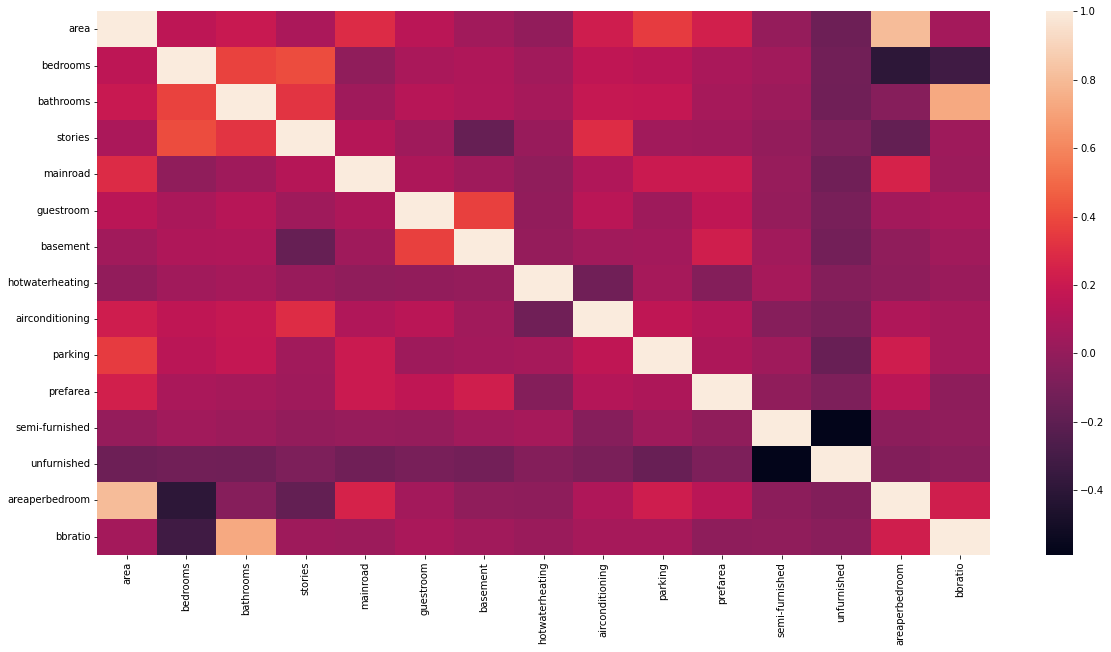

In [57]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr())

In [62]:
X.corr().shape

(15, 15)

In [64]:
X.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278,0.805610,0.057116
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252,-0.397259,-0.317303
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107,-0.052352,0.727154
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972,-0.178942,0.032962
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123,0.249829,0.030407
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023,0.054312,0.075854
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935,-0.017034,0.047346
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194,-0.021634,0.021520
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086,0.096830,0.064649
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.041327,-0.165705,0.224387,0.064107


In [63]:
ij_max = np.unravel_index(X.corr().argmax(), X.corr().shape)
print("ij_max",ij_max)

AttributeError: 'DataFrame' object has no attribute 'argmax'